In [1]:
import numpy as np
import pandas as pd
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt
import re
from utils import *

pd.set_option('future.no_silent_downcasting', True)

In [2]:
path_data = Path("../data")

In [3]:
all_data = pd.read_pickle(path_data / "analysis_with_nan.pickle")
tractor_data = pd.read_pickle(path_data / "operator_with_nan.pickle")

In [4]:
all_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target
2111856,94.8,468.0,1897.00,NaN,0.0,468.0,76.0,760.0,28.15,1897.00,2023-06-12 14:08:51,2
1692756,0.0,308.0,1243.25,1216.0,8.3,308.0,74.0,760.0,NaN,1243.25,2023-07-16 23:36:18,2
795101,0.0,344.0,1295.50,1104.0,7.2,344.0,82.0,760.0,NaN,1295.50,2023-07-20 20:08:48,0


In [5]:
tractor_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,tractor_type
1666195,0.0,588.0,1908.5,1248.0,0.0,588.0,63.0,NaN,NaN,1908.5,2023-08-17 04:23:04,С2586
1173077,0.0,520.0,1910.0,NaN,10.3,520.0,77.0,784.0,27.9,1910.0,2023-07-03 09:22:56,С2586
3102644,84.0,480.0,1869.0,1216.0,0.0,480.0,75.0,720.0,28.1,1869.0,2023-08-08 16:49:00,С1178


In [6]:
all_data.nunique()

Полож.пед.акселер.,%                          298
Давл.масла двиг.,кПа                         1501
Обор.двиг.,об/мин                           15532
КПП. Давление масла в системе смазки         3001
Скорость                                      597
ДВС. Давление смазки                         1601
ДВС. Температура охлаждающей жидкости         151
Давление в пневмостистеме (spn46), кПа        979
Электросистема. Напряжение                    258
ДВС. Частота вращения коленчатого вала      15579
Дата и время                              2522344
target                                          3
dtype: int64

In [7]:
tractor_data.nunique()

Полож.пед.акселер.,%                          251
Давл.масла двиг.,кПа                          177
Обор.двиг.,об/мин                           12268
КПП. Давление масла в системе смазки           88
Скорость                                      595
ДВС. Давление смазки                          177
ДВС. Температура охлаждающей жидкости         108
Давление в пневмостистеме (spn46), кПа         84
Электросистема. Напряжение                    240
ДВС. Частота вращения коленчатого вала      12322
Дата и время                              2358528
tractor_type                                   14
dtype: int64

In [8]:
tractor_data.shape, all_data.shape

((2666861, 12), (2856565, 12))

In [9]:
all_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
target                                         0
dtype: int64

In [10]:
tractor_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
tractor_type                                   0
dtype: int64

In [11]:
all_data.drop_duplicates(inplace=True, ignore_index=True)
tractor_data.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
tractor_data.shape, all_data.shape

((2623314, 12), (2813018, 12))

In [13]:
data = pd.merge(all_data,
    tractor_data, 
    on=['Полож.пед.акселер.,%', 'Давл.масла двиг.,кПа', 'Обор.двиг.,об/мин',
        'КПП. Давление масла в системе смазки', 'Скорость',
        'ДВС. Давление смазки', 'ДВС. Температура охлаждающей жидкости',
        'Давление в пневмостистеме (spn46), кПа', 'Электросистема. Напряжение',
        'ДВС. Частота вращения коленчатого вала', 'Дата и время'],
    how="inner")

In [14]:
data.bfill(inplace=True)
data.ffill(inplace=True)

In [15]:
data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target,tractor_type
365962,0.0,360.0,1674.000,1008.0,25.6,360.0,82.0,784.0,14.05,1674.000,2023-06-07 12:33:09,0,С2177
1520879,94.8,460.0,1905.375,1280.0,0.0,460.0,76.0,760.0,28.10,1905.375,2023-06-23 14:07:24,2,С1067
516321,0.0,456.0,1919.000,1200.0,0.0,456.0,84.0,808.0,26.75,1919.000,2023-08-20 16:36:56,2,023Т0255


In [16]:
data.sort_values(["tractor_type", "target", "Дата и время"], ignore_index=True, axis=0, inplace=True)

In [18]:
for tractor in data["tractor_type"].unique():
    print(tractor, data[data["tractor_type"] == tractor]["target"].unique())

022C4097 [0]
023T0569 [0]
023Т0049 [0]
023Т0255 [2]
023Т0719 [0]
C1969 [0]
Р3106 [2]
С0790 [2]
С0873 [2]
С1067 [2]
С1178 [2]
С2177 [0]
С2586 [2]
С2627 7226ом61 [0]


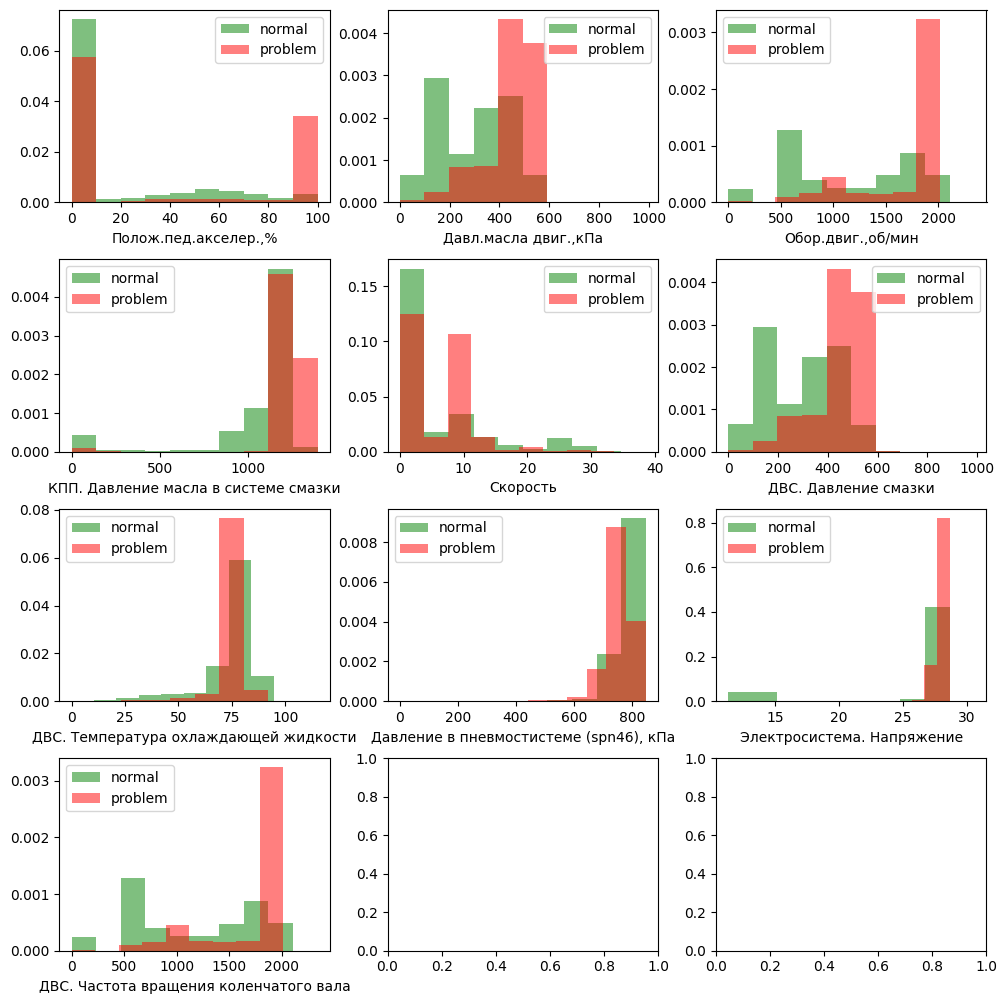

In [19]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=2)

for i, num_col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    df_target_0 = data.loc[data["target"] == 0, num_col]
    df_target_2 = data.loc[data["target"] == 2, num_col]
    axis[row][col].hist(df_target_0, alpha=0.5, label="normal", density=True, color="green")
    axis[row][col].hist(df_target_2, alpha=0.5, label='problem', density=True, color="red")
    axis[row][col].legend()
    axis[row][col].set_xlabel(num_col)

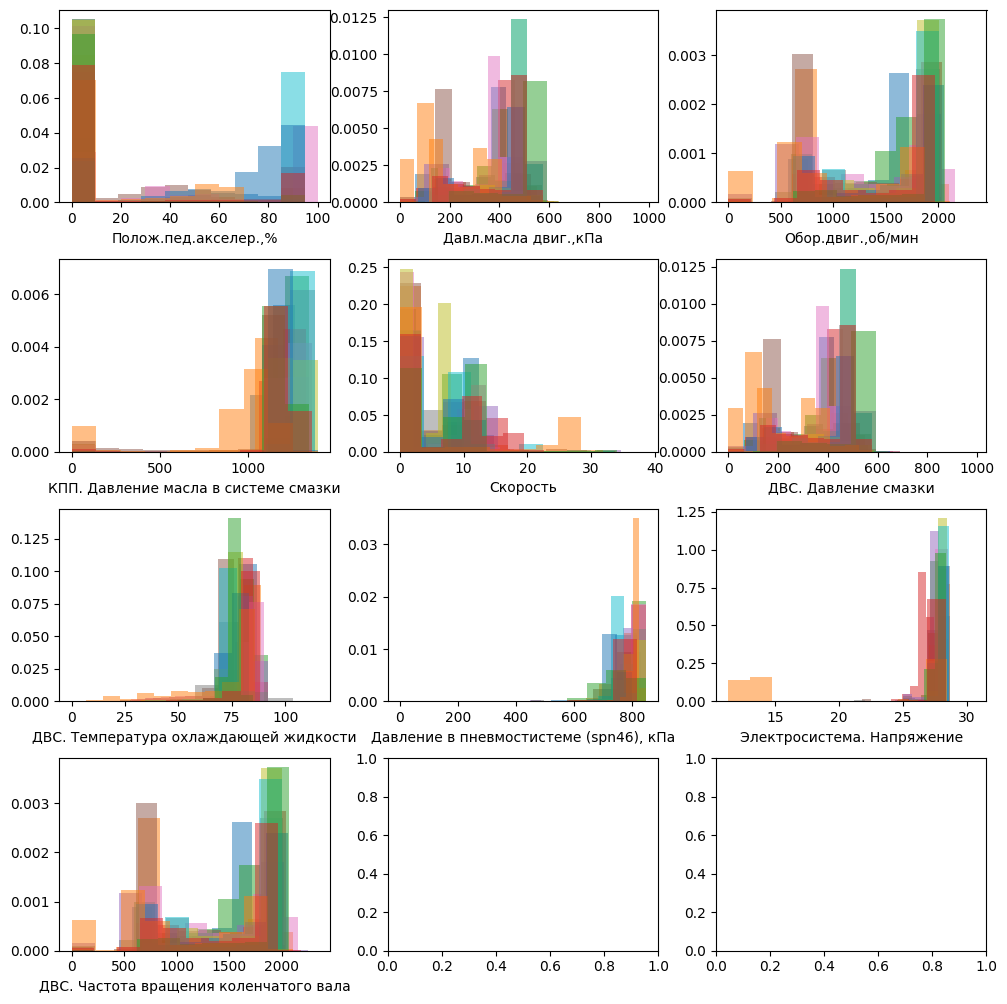

In [20]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=2)

for i, num_col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    for tractor in data["tractor_type"].unique():
        tractor_data = data.loc[data["tractor_type"] == tractor]
        df = tractor_data[num_col]
        axis[row][col].hist(df, alpha=0.5, label=tractor, density=True)
    # for tractor in data["tractor_type"].unique():
    #     df = data[data["tractor_type"] == tractor].loc[data["target"] == 0, num_col]
    axis[row][col].set_xlabel(num_col);